<a href="https://colab.research.google.com/github/shobhittya/deeplearning/blob/main/MiniNet_Deepfake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt2
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import (Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout)
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras import regularizers
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


In [23]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':128, 'width':128, 'channels':3}

In [4]:
!pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od

In [6]:
dataset_url = "https://www.kaggle.com/xhlulu/140k-real-and-fake-faces"

In [7]:
import os

In [8]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shobhittyagi
Your Kaggle Key: ··········


100%|██████████| 3.75G/3.75G [01:02<00:00, 64.4MB/s]


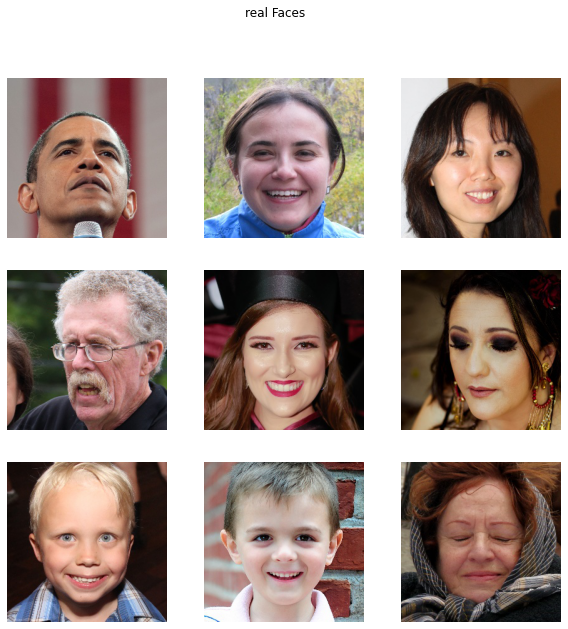

In [24]:
path = '/content/140k-real-and-fake-faces/real_vs_fake/real-vs-fake'

def plot_img(path, set_):
    dir_ = os.path.join(path, 'train', set_)
    k = 0
    fig, ax = plt.subplots(3,3, figsize=(10,10))
    fig.suptitle(set_ + 'Faces')
    for j in range(3):
        for i in range(3):
            img = load_img(os.path.join(dir_, os.listdir(os.path.join(dir_))[k]))          
            ax[j,i].imshow(img)
            ax[j,i].set_title("")
            ax[j,i].axis('off')
            k +=1
  #  fig.tight_layout()
    plt.suptitle(set_ + ' Faces')
    return plt

plot_img(path, 'real').show()

In [25]:
bs = 64
row, col = 128, 128
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True
                                  )
training_set = train_datagen.flow_from_directory(path + '/train',
                                                 class_mode='binary',
                                                 shuffle=True,
                                                 target_size=(row,col),
                                                 batch_size=bs
                                                )
val_test_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_test_datagen.flow_from_directory(path + '/valid',
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      target_size=(row,col),
                                                      batch_size=bs
                                                     ) 
test_set = val_test_datagen.flow_from_directory(path + '/test',
                                                class_mode='binary',
                                                shuffle=True,
                                                target_size=(row,col),
                                                batch_size=bs
                                               )
training_set.class_indices

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [65]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (128, 128, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(2, activation='softmax')
     ]
)


In [66]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot


In [67]:
tf.keras.utils.pydot = pydot

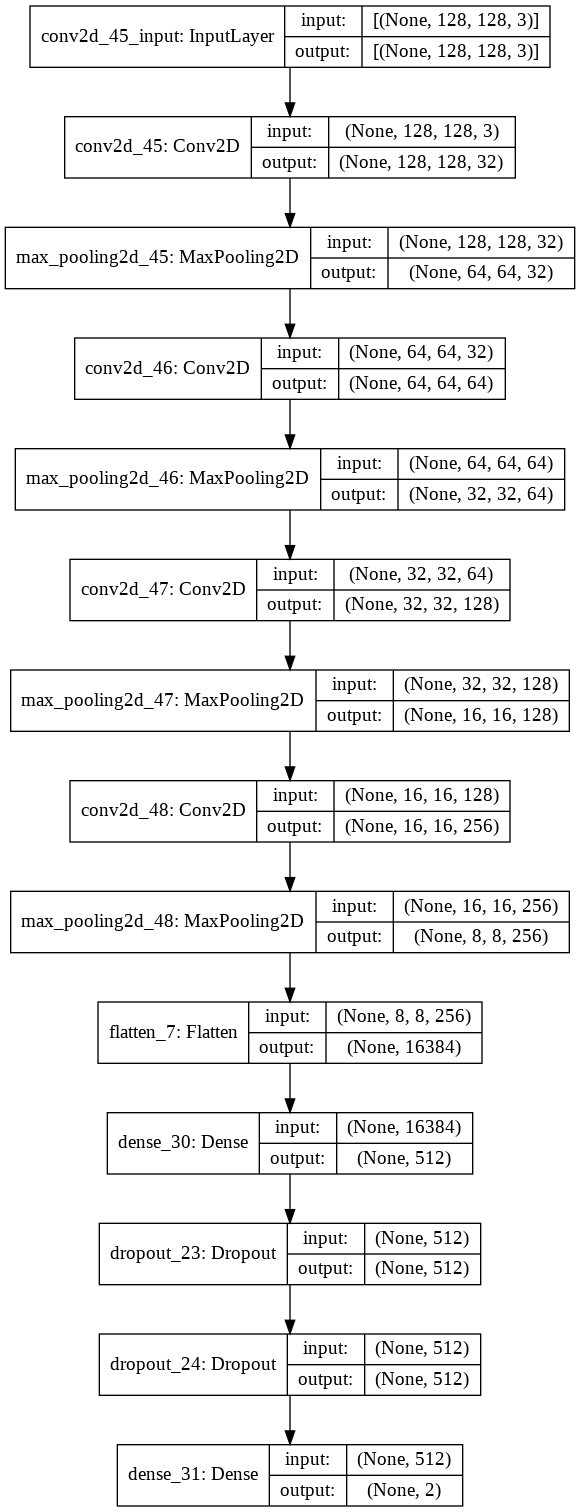

In [70]:
plot_model(model, to_file='model.png', show_shapes=True)

In [71]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 256)      

In [76]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [77]:
epochs = 10
batch_size = 32
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [78]:
checkpoint = ModelCheckpoint(filepath='/content/Model_weights/MiniNet.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=10, 
                              verbose=1
                             )
csv_logger = CSVLogger('training.log')

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience =5,
                              verbose = 0,
                              mode = 'auto')

callbacks = [checkpoint, reduce_lr, early_stopping, csv_logger]

In [84]:
%%time
history = model.fit(training_set, validation_data = validation_set, epochs = epochs, validation_steps = 100, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 238s 152ms/step - loss: 0.1410 - accuracy: 0.9458 - val_loss: 0.1787 - val_accuracy: 0.9344
Epoch 2/10
1563/1563 [==============================] - 228s 146ms/step - loss: 0.1307 - accuracy: 0.9497 - val_loss: 0.1537 - val_accuracy: 0.9428
Epoch 3/10
1563/1563 [==============================] - 240s 154ms/step - loss: 0.1253 - accuracy: 0.9517 - val_loss: 0.1787 - val_accuracy: 0.9322
Epoch 4/10
1563/1563 [==============================] - 244s 156ms/step - loss: 0.1173 - accuracy: 0.9552 - val_loss: 0.1552 - val_accuracy: 0.9400
Epoch 5/10
1563/1563 [==============================] - 229s 147ms/step - loss: 0.1126 - accuracy: 0.9571 - val_loss: 0.1882 - val_accuracy: 0.9356
Epoch 6/10
1563/1563 [==============================] - 225s 144ms/step - loss: 0.1088 - accuracy: 0.9583 - val_loss: 0.1533 - val_accuracy: 0.9463
Epoch 7/10
1563/1563 [==============================] - 230s 147ms/step - loss: 0.1036 - accuracy: 0.9604 - val_

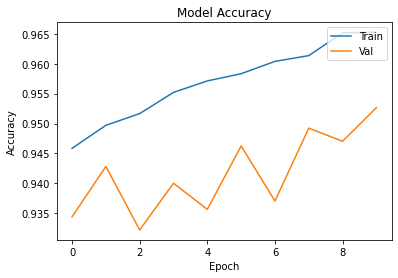

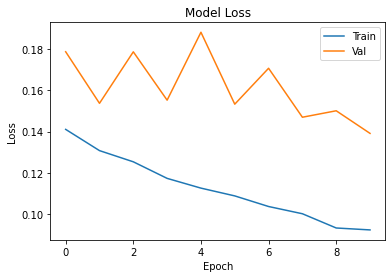

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [86]:
test_loss, test_acc = model.evaluate(test_set)

313/313 [==============================] - 38s 121ms/step - loss: 0.1346 - accuracy: 0.9525


**Confusion Matrix and Classification Report**

In [88]:
from keras.models import model_from_yaml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import os
from numpy import array
import numpy as np
import pandas as pd